# Plot Mactices

In [1]:
import os
os.chdir("projects_on_GitHub/data_viz/Visualization_with_mpl_and_sns")

In [2]:
# 导入数据
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


### Example 1: Explore the pair-wise relationship between features in Pokemon Dataset Using `plt.hist()` and `plt.scatter()`

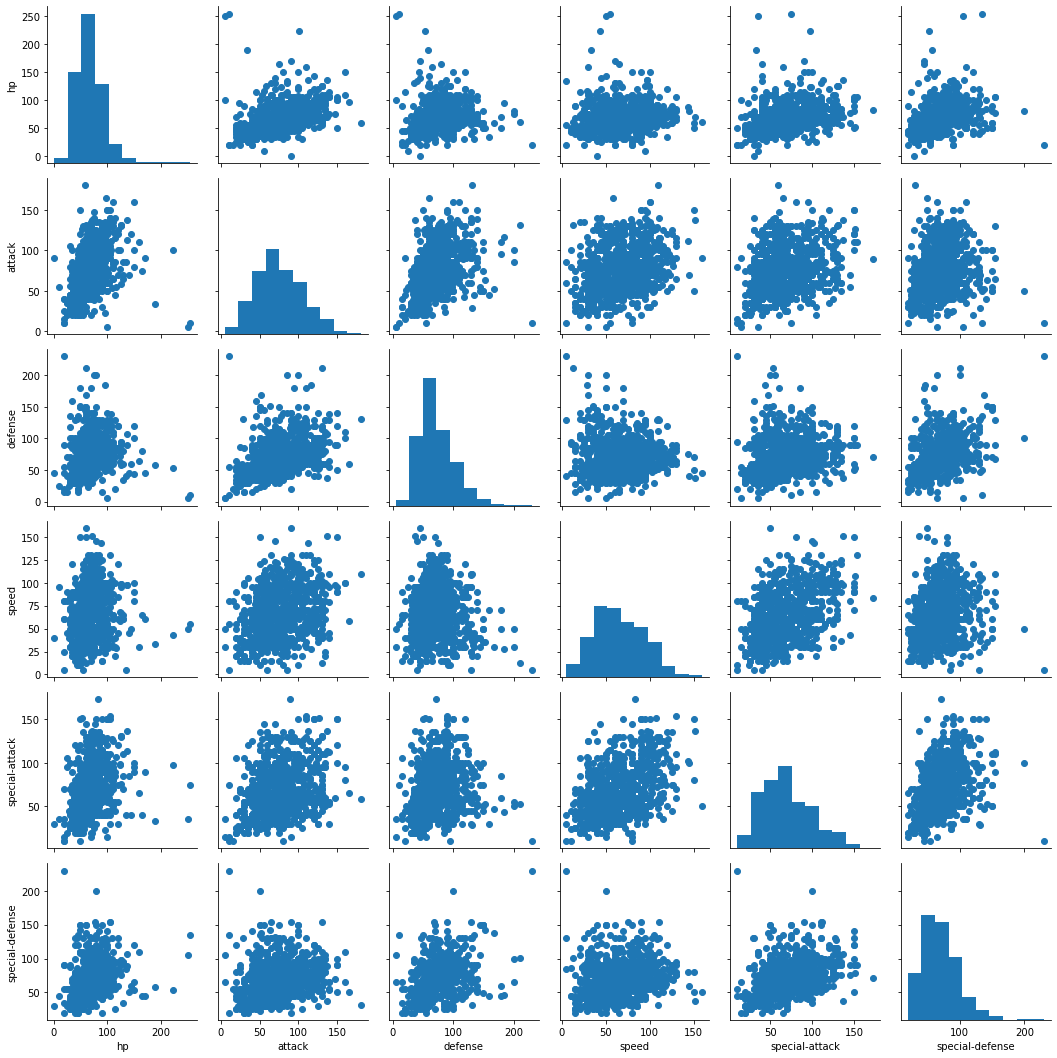

In [3]:
pkmn_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']

f = sns.PairGrid(data=pokemon, vars=pkmn_stats)
f.map_diag(plt.hist)
f.map_offdiag(plt.scatter);

### Example 2: Explore the pair-wise relationship of features in Pokemon Dataset Using `sns.heatmap()`

In [4]:
pokemon[pkmn_stats].corr()

,hp,attack,defense,speed,special-attack,special-defense
hp,1.000000,0.433318,0.231540,0.169512,0.377446,0.367949
attack,0.433318,1.000000,0.435514,0.335289,0.325937,0.202138
defense,0.231540,0.435514,1.000000,-0.023866,0.199560,0.508688
speed,0.169512,0.335289,-0.023866,1.000000,0.440411,0.202847
special-attack,0.377446,0.325937,0.199560,0.440411,1.000000,0.481345
special-defense,0.367949,0.202138,0.508688,0.202847,0.481345,1.000000


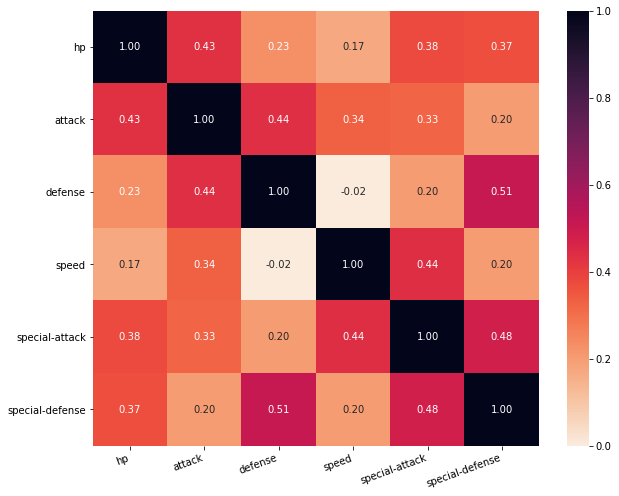

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=pokemon[pkmn_stats].corr(), annot=True, fmt='.2f', cmap='rocket_r', vmin=0)

plt.yticks(rotation=0)
plt.xticks(rotation=20, ha='right');

### Example 3: Explore the pair-wise relationship between features in Fuel-econ Dataset Using `plt.hist()` and `plt.scatter()`

___Context:___

By creating a plot matrix, explore the relationship between five numeric variables in the fuel efficiency dataset: `displ`, `co2`, `city`, `highway`, and `comb` to find out potential new insights.

(**to be continued ...**)

In [6]:
# 导入数据
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


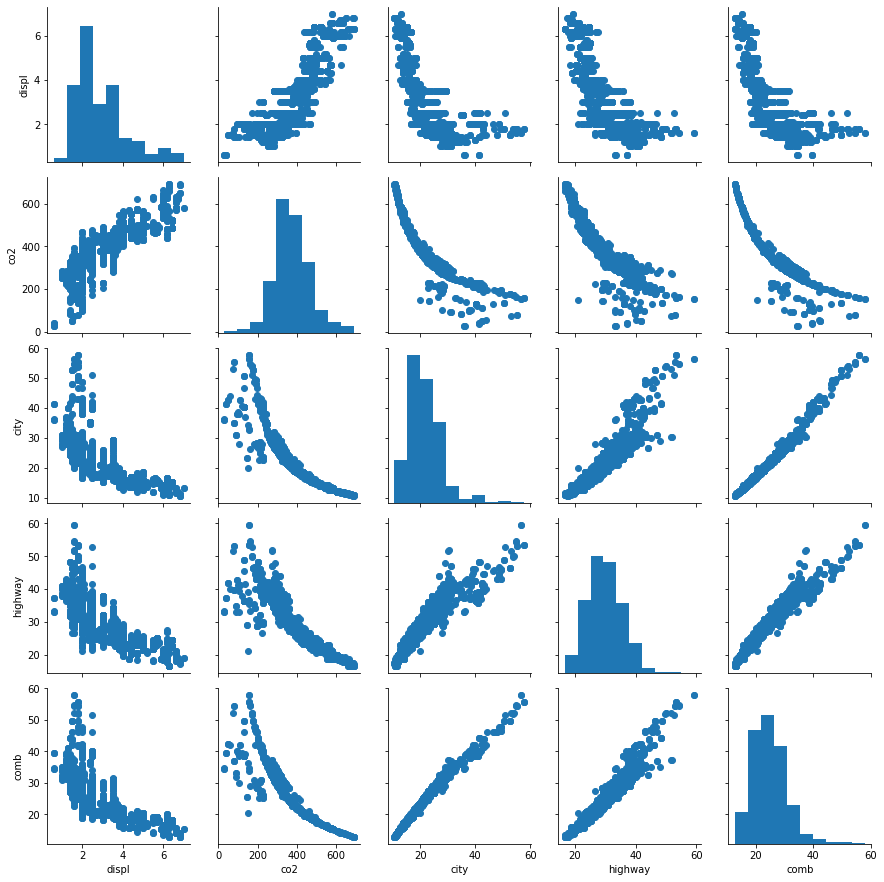

In [17]:
fuel_stats = ['displ', 'co2', 'city', 'highway', 'comb']

pg = sns.PairGrid(data=fuel_econ[fuel_stats])
pg.map_offdiag(plt.scatter)
pg.map_diag(plt.hist);


___Insight:___ I set up my PairGrid to plot scatterplots off the diagonal and histograms on the diagonal. The intersections where 'co2' meets the fuel mileage measures are fairly interesting in how tight the curves are. You'll explore this more in the next task.

### Example 4: Create a new feature to explore deeper into the fuel-econ dataset.

___Context:___

The output of the preceding task pointed out a potentially interesting relationship between co2 emissions and overall fuel efficiency. Engineer a new variable that depicts CO2 emissions as a function of gallons of gas (`g / gal`). (The `co2` variable is in units of `g / mi`, and the `comb` variable is in units of `mi / gal`.) Then, plot this new emissions variable against engine size (`displ`) and fuel type (`fuelType`). For this task, compare not just `Premium Gasoline` and `Regular Gasoline`, but also `Diesel` fuel.

In [8]:
list(fuel_econ)

['id',
 'make',
 'model',
 'year',
 'VClass',
 'drive',
 'trans',
 'fuelType',
 'cylinders',
 'displ',
 'pv2',
 'pv4',
 'city',
 'UCity',
 'highway',
 'UHighway',
 'comb',
 'co2',
 'feScore',
 'ghgScore']

In [9]:
fuel_econ.fuelType.unique()

array(['Premium Gasoline', 'Regular Gasoline', 'Diesel',
       'Midgrade Gasoline', 'Natural Gas'], dtype=object)

In [10]:
selected_fuelType = ['Premium Gasoline', 'Regular Gasoline', 'Diesel']

fuel_econ_subset = fuel_econ[fuel_econ.fuelType.isin(selected_fuelType)].copy()

In [11]:
fuel_econ_subset.loc[:, 'co2_emi'] = fuel_econ_subset.loc[:, 'co2'] * fuel_econ_subset.loc[:, 'comb']

In [12]:
fuel_econ_subset.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,co2_emi
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,8826.0219
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,8802.7223
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,8868.1164
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,8865.3204
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,8891.2030


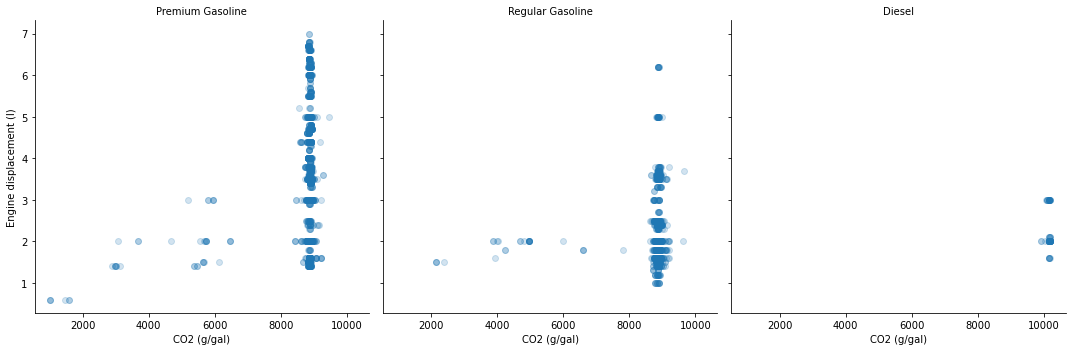

In [13]:
fg = sns.FacetGrid(data=fuel_econ_subset, col='fuelType', height=5)
fg.map(plt.scatter, 'co2_emi', 'displ', alpha=0.2)

fg.set_ylabels('Engine displacement (l)')
fg.set_xlabels('CO2 (g/gal)')
fg.set_titles('{col_name}');


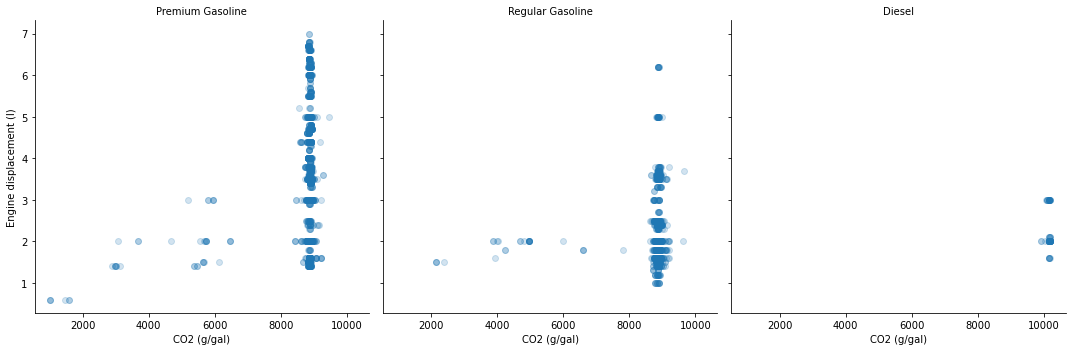

In [14]:
def facet_plot():
    
    selected_fuelType = ['Premium Gasoline', 'Regular Gasoline', 'Diesel']
    fuel_econ_subset = fuel_econ.loc[fuel_econ.fuelType.isin(selected_fuelType), :].copy()

    fuel_econ_subset.loc[:, 'co2_emi'] = fuel_econ_subset.loc[:, 'co2'] * fuel_econ_subset.loc[:, 'comb']
    
    fg = sns.FacetGrid(data=fuel_econ_subset, col='fuelType', height=5)
    fg.map(plt.scatter, 'co2_emi', 'displ', alpha=0.2)

    fg.set_ylabels('Engine displacement (l)')
    fg.set_xlabels('CO2 (g/gal)')
    fg.set_titles('{col_name}');
    
facet_plot()

___Insights:___ 

Due to the high number of data points and their high amount of overlap, I've chosen to plot the data in a faceted plot. 

1. We can see that engine sizes are smaller for cars that use regular gasoline against those that use premium gas.
2. Most cars fall in an emissions band a bit below 9 kg CO2 per gallon; diesel cars are consistently higher, a little above 10 kg CO2 per gallon.

# 